### Đặng Quang Hưng - ITDSIU18035

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive')
!pwd

/content/gdrive/My Drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

###Part 1.1


In [ ]:
df = pd.read_csv('data.csv',  encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# choose a random variable
df = df.loc[df['Country'] == 'United Kingdom']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [ ]:
df['totalPerInvoice'] = df[['Quantity']].multiply(df["UnitPrice"], axis="index")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPerInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,214.80


In [ ]:
# choose random variable
df = df.groupby('InvoiceNo').sum()
df

,Quantity,UnitPrice,CustomerID,totalPerInvoice
InvoiceNo,,,,
536365,40,27.37,124950.0,139.12
536366,12,3.70,35700.0,22.20
536367,83,58.24,156564.0,278.73
536368,15,19.10,52188.0,70.05
536369,3,5.95,13047.0,17.85
...,...,...,...,...
C581484,-80995,2.08,16446.0,-168469.60
C581490,-23,2.78,28794.0,-32.53
C581499,-1,224.69,15498.0,-224.69


In [ ]:
boot_means = []
boot_stds = []
for _ in range(1000):
    boot_sample = np.random.choice(df['totalPerInvoice'].tolist(), replace = True, size = 1000) 
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
    ###################################################
    boot_std = np.std(boot_sample)
    boot_stds.append(boot_std)

boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation
boot_std_np = np.array(boot_stds)


In [ ]:
boot_means = np.mean(boot_means_np)# bootstrapped sample means
print('bootstrapped sample means: ', boot_means)

print('true population mean: ', np.mean(df['totalPerInvoice'].tolist()))# recall: true population mean

boot_std = np.std(boot_means_np) # bootstrapped std
print('bootstrapped std: ',boot_std)

bootstrapped sample means:  351.58702468
true population mean:  348.50627240997704
bootstrapped std:  66.93277737720157


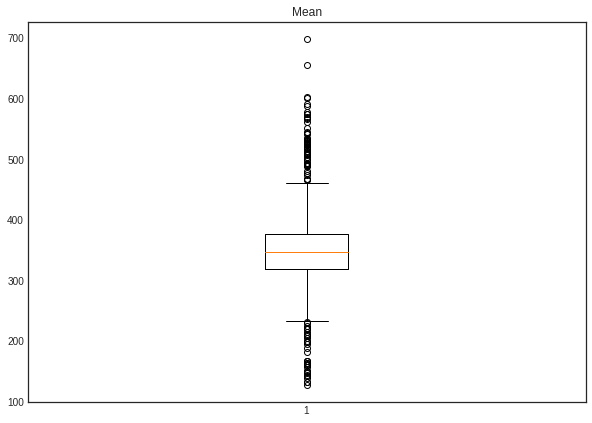

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(10, 7))
plt.boxplot(boot_means_np)
plt.title('Mean');


In [ ]:
quartiles = np.percentile(boot_means_np, [25, 50, 75])
# calculate min/max
data_min, data_max = boot_means_np.min(), boot_means_np.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 127.081
Q1: 318.641
Median: 346.923
Q3: 376.203
Max: 698.207


Text(0.5, 1.0, 'standard deviation')

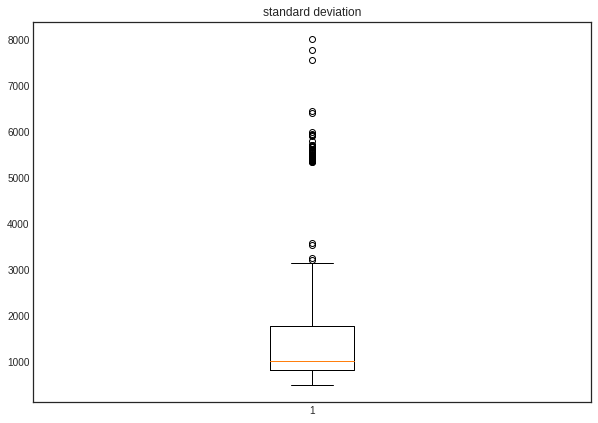

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.boxplot(boot_std_np)
plt.title('standard deviation')

<Figure size 720x720 with 0 Axes>

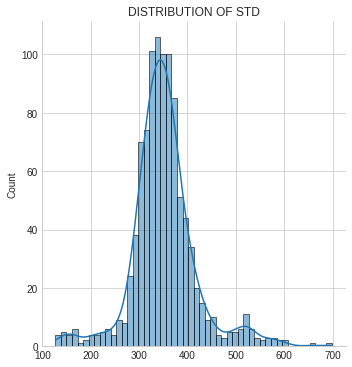

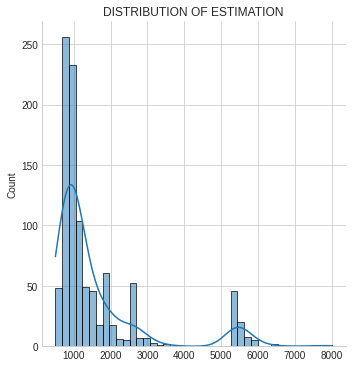

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10)) 

sns.displot(boot_means_np, kde = True)
plt.title('DISTRIBUTION OF STD');

sns.displot(boot_std_np, kde = True)
plt.title('DISTRIBUTION OF ESTIMATION');

In [ ]:
# standard errors
from scipy import stats
print('Standard Errors :')
stats.sem(boot_means_np, axis = None, ddof=0)

Standard Errors :


2.1166002663294803

In [ ]:
#confident interval
np.percentile(boot_means_np, [2.5,97.5])# 95% C.I.

array([204.42427178, 525.01761677])

###Task 2.1

In [ ]:
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats
import random

In [ ]:
hey = random.sample(df['totalPerInvoice'].tolist(), 1000)

In [ ]:
sample_estimate = []
sample_stds = []
for i in range(1000):
  resamples = jackknife_resampling(np.array(hey))
  avg = np.mean(resamples[i])
  sample_estimate.append(avg)
  #################################
  std = np.std(np.array(resamples[i]))
  sample_stds.append(std)

# sample_estimate
# sample_stds
  


In [ ]:
test_statistic = np.mean
estimate, bias, stderr, conf_interval = jackknife_stats(np.array(sample_estimate), test_statistic, 0.95)

In [ ]:
estimate

351.3256499998864

In [ ]:
bias

1.1357315088389441e-10

In [ ]:
stderr

0.02596156450383202

In [ ]:
conf_interval

array([351.27476627, 351.37653373])

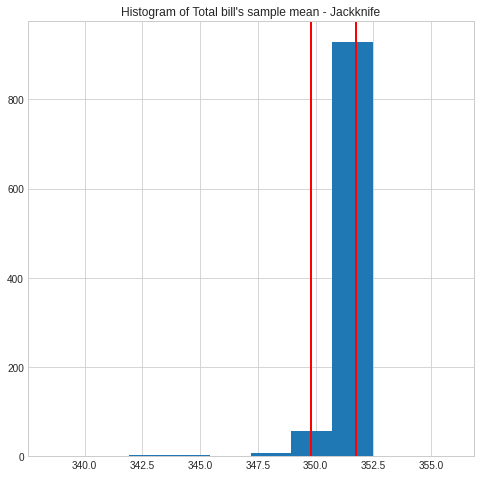

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(sample_estimate, alpha = 1)
plt.axvline(np.percentile(sample_estimate,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(sample_estimate,97.5),color = 'red',linewidth=2)
plt.title("Histogram of Total bill's sample mean - Jackknife")
plt.show()

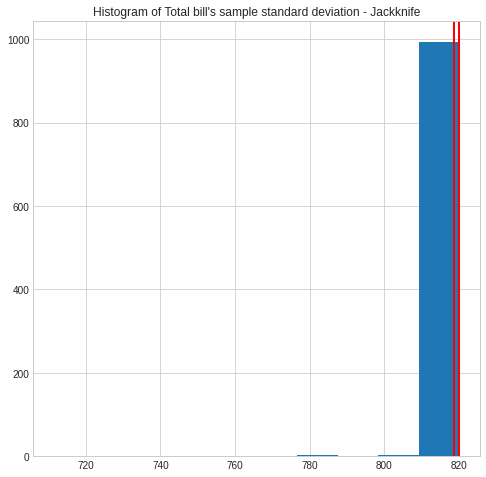

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(sample_stds, alpha = 1)
plt.axvline(np.percentile(sample_stds,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(sample_stds,97.5),color = 'red',linewidth=2)
plt.title("Histogram of Total bill's sample standard deviation - Jackknife")
plt.show()

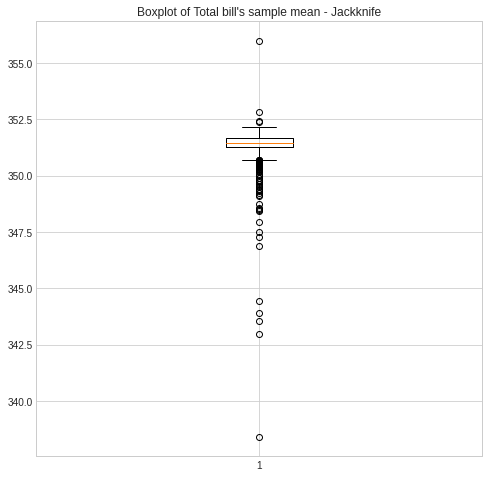

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(sample_estimate)
plt.title("Boxplot of Total bill's sample mean - Jackknife")
plt.show()

In [ ]:
quartiles = np.percentile(np.array(sample_estimate), [25, 50, 75])
# calculate min/max
data_min, data_max = np.array(sample_estimate).min(), np.array(sample_estimate).max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 338.414
Q1: 351.277
Median: 351.470
Q3: 351.667
Max: 355.969


Text(0.5, 1.0, 'standard deviation')

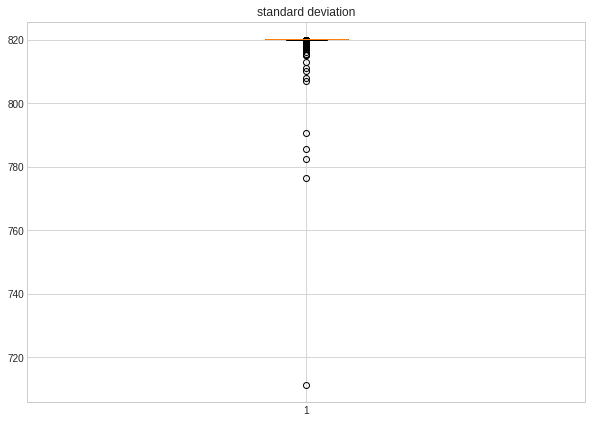

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(sample_stds)
plt.title('standard deviation')

###Task 1.2


In [ ]:
data = pd.read_csv('GlobalLandTemperaturesByCity.csv')
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
data = data.loc[data['Country'] == 'India']
data = data.dropna(axis=0)
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E
...,...,...,...,...,...,...,...
8385504,2013-04-01,29.800,0.375,Yelahanka,India,13.66N,76.79E
8385505,2013-05-01,29.286,0.516,Yelahanka,India,13.66N,76.79E
8385506,2013-06-01,25.401,0.400,Yelahanka,India,13.66N,76.79E
8385507,2013-07-01,24.232,0.323,Yelahanka,India,13.66N,76.79E


In [ ]:
boot_means = []
boot_stds = []
for _ in range(1000):
    boot_sample = np.random.choice(data['AverageTemperature'].tolist(), replace = True, size = 1000) 
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
    ##########################################################
    boot_std = np.std(boot_sample)
    boot_stds.append(boot_std)


boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation
boot_std_np = np.array(boot_stds)


In [ ]:
boot_means = np.mean(boot_means_np)# bootstrapped sample means
print('bootstrapped sample means: ', boot_means)

print('true population mean: ', np.mean(data['AverageTemperature'].tolist()))# recall: true population mean

boot_std = np.std(boot_means_np) # bootstrapped std
print('bootstrapped std: ',boot_std)

bootstrapped sample means:  25.428536682999997
true population mean:  25.42922403773681
bootstrapped std:  0.1644638647481522


<Figure size 1440x720 with 0 Axes>

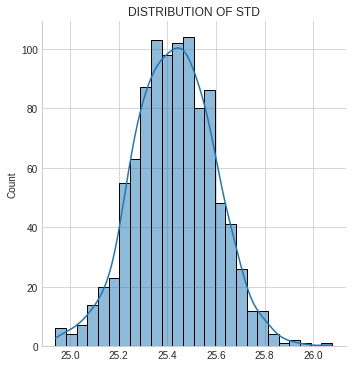

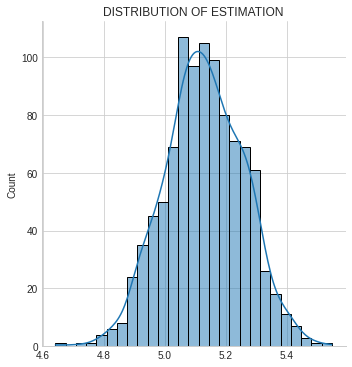

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 

sns.displot(boot_means_np, kde = True)
plt.title('DISTRIBUTION OF STD');

sns.displot(boot_std_np, kde = True)
plt.title('DISTRIBUTION OF ESTIMATION');

{'boxes': [<matplotlib.lines.Line2D at 0x7f95e3641190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f95e1846490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f95e1820d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f95e182d090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f95e18460d0>,
  <matplotlib.lines.Line2D at 0x7f95e1846bd0>]}

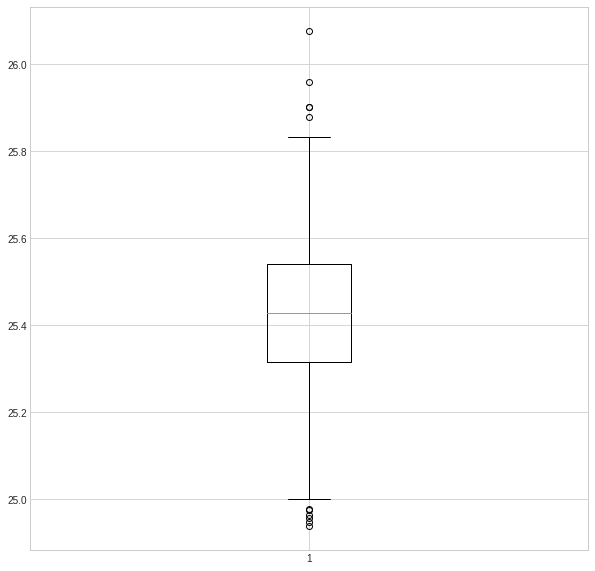

In [ ]:
plt.figure(figsize=(10, 10))
plt.boxplot(boot_means_np)

In [ ]:
quartiles = np.percentile(boot_means_np, [25, 50, 75])
# calculate min/max
data_min, data_max = boot_means_np.min(), boot_means_np.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 24.940
Q1: 25.316
Median: 25.429
Q3: 25.541
Max: 26.076


{'boxes': [<matplotlib.lines.Line2D at 0x7f95e37efc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f95e37e4c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f95e37d8510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f95e37d81d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f95e37efb90>,
  <matplotlib.lines.Line2D at 0x7f95e37e4610>]}

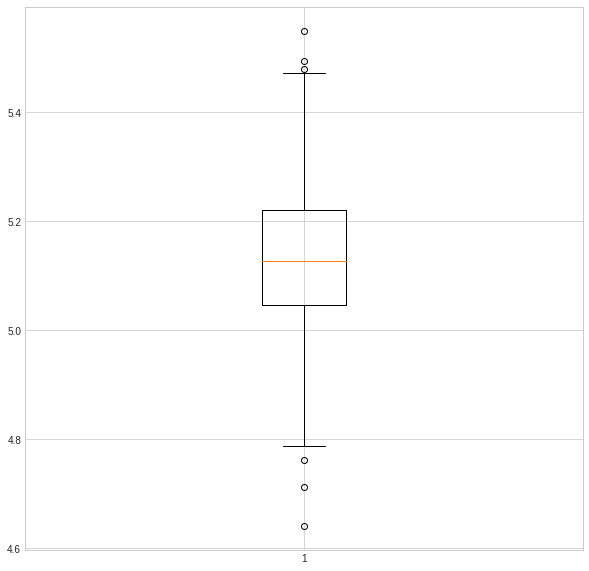

In [ ]:
plt.figure(figsize=(10, 10))
plt.boxplot(boot_std_np)

In [ ]:
# standard errors
from scipy import stats
stats.sem(boot_means_np, axis = None, ddof=0)

0.005200804053980356

In [ ]:
#confident interval
np.percentile(boot_means_np, [2.5,97.5])# 95% C.I.

array([25.09563188, 25.75023643])

### Task 2.2

In [ ]:
hehe = random.sample(data['AverageTemperature'].tolist(), 1000)

In [ ]:
sample_estimate = []
sample_stds = []
for i in range(1000):
  resamples = jackknife_resampling(np.array(hehe))
  avg = np.mean(resamples[i])
  sample_estimate.append(avg)
  #################################
  std = np.std(np.array(resamples[i]))
  sample_stds.append(std)

# sample_estimate
# sample_stds
  


In [ ]:
test_statistic = np.mean
estimate, bias, stderr, conf_interval = jackknife_stats(np.array(sample_estimate), test_statistic, 0.95)

In [ ]:
estimate

25.389883

In [ ]:
bias

0.0

In [ ]:
stderr

0.00016671140403502093

In [ ]:
conf_interval

array([25.38955625, 25.39020975])

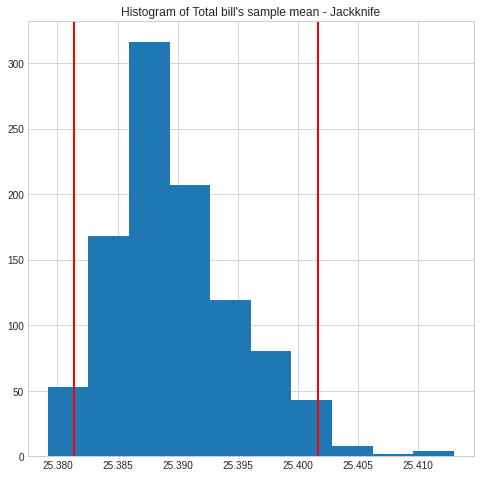

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(sample_estimate, alpha = 1)
plt.axvline(np.percentile(sample_estimate,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(sample_estimate,97.5),color = 'red',linewidth=2)
plt.title("Histogram of Total bill's sample mean - Jackknife")
plt.show()

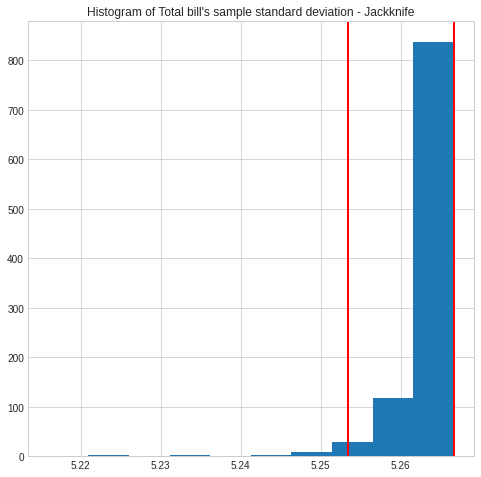

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(sample_stds, alpha = 1)
plt.axvline(np.percentile(sample_stds,2.5),color = 'red',linewidth=2)
plt.axvline(np.percentile(sample_stds,97.5),color = 'red',linewidth=2)
plt.title("Histogram of Total bill's sample standard deviation - Jackknife")
plt.show()

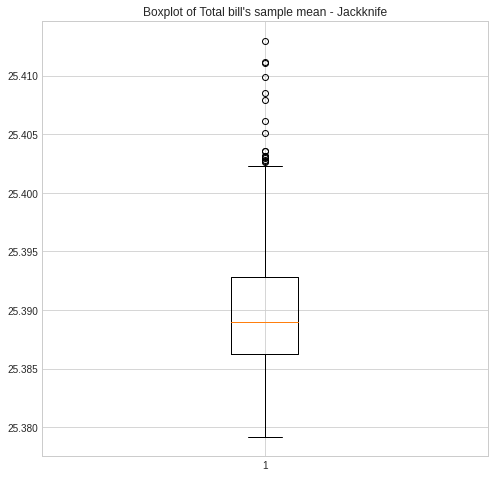

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(sample_estimate)
plt.title("Boxplot of Total bill's sample mean - Jackknife")
plt.show()

In [ ]:
quartiles = np.percentile(np.array(sample_estimate), [25, 50, 75])
# calculate min/max
data_min, data_max = np.array(sample_estimate).min(), np.array(sample_estimate).max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 25.379
Q1: 25.386
Median: 25.389
Q3: 25.393
Max: 25.413


Text(0.5, 1.0, 'standard deviation')

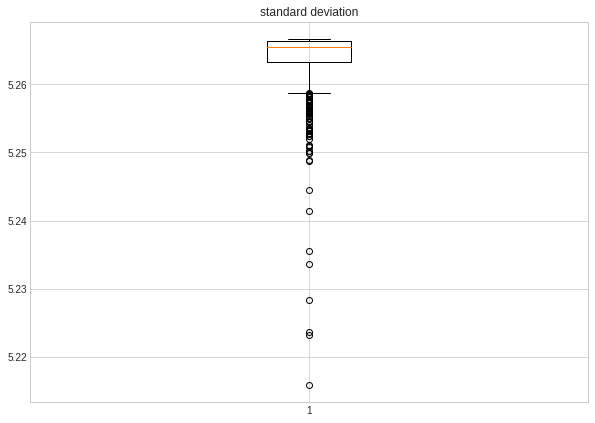

In [ ]:
plt.figure(figsize=(10, 7))
plt.boxplot(sample_stds)
plt.title('standard deviation')